In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os,shutil
import pandas as pd
import keras
from keras.layers import *
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import autokeras as ak
from autokeras import StructuredDataClassifier

2023-06-20 14:15:40.736596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 14:15:45.834040: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-20 14:15:45.834131: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-20 14:15:45.834142: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/First"
train=os.listdir(path)
print(train)
print("Training Data:- ")
for f in train:
    path= "/home/urvashiarora3195/Capstone_project/Paper1_revision/data/First/" +f
    print(f+ " "+ str(len(os.listdir(path))))



['.ipynb_checkpoints', 'Control', 'Case']
Training Data:- 
.ipynb_checkpoints 0
Control 601
Case 446


In [3]:
!ls

First_classification.ipynb   Third_classification.ipynb
Second_classification.ipynb


In [4]:
from keras.utils import load_img, img_to_array
path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/First"
train=os.listdir(path)
print(train)
image_data_train=[]
label_train=[]
for f in train:
    path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/First/"+f+'/'
    entries=os.listdir(path)
    for entry in entries:
        if f=='Case':
            label=0
        else:
            label=1
        image=load_img(path+entry,target_size=(224,224,1))
        image_array=np.reshape(np.average((img_to_array(image)/255.0), axis=2), (224,224,1))
        image_data_train.append(image_array)
        label_train.append(label)

image_data_train=np.array(image_data_train)
label_train=np.array(label_train)

print(image_data_train.shape)

['.ipynb_checkpoints', 'Control', 'Case']
(1047, 224, 224, 1)


In [5]:
x_train, X_test, y1_train, y_test = train_test_split(image_data_train, label_train, test_size=0.15, random_state=3)
print(x_train.shape, X_test.shape, y1_train.shape, y_test.shape)

(889, 224, 224, 1) (158, 224, 224, 1) (889,) (158,)


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y1_train, test_size=0.176, random_state=3)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(732, 224, 224, 1) (157, 224, 224, 1) (732,) (157,)


In [7]:
pd.Series(y_train).value_counts()

1    420
0    312
dtype: int64

In [8]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


In [9]:
train_data = datagen.fit(X_train)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import InputLayer
from tensorflow.keras import regularizers
from sklearn.utils import class_weight
#class_weight = {0: 5.6,1: 0.75}

#model = Sequential()


In [11]:
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(224,224,1), dtype = "float32"),
#   tf.keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1, 1), activation="ReLU"),
#   tf.keras.layers.BatchNormalization(),

#Back up

# model = tf.keras.Sequential([
#   tf.keras.layers.InputLayer(input_shape=(224,224,1), dtype = "float32"),
#   tf.keras.layers.Normalization(axis=-1, mean=None, variance=None),
#   tf.keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1, 1), activation="ReLU"),
#   tf.keras.layers.Conv2D(64, kernel_size=(2,2), strides=(1, 1), activation="ReLU"),
#   tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(1,activation="sigmoid")])



model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(224,224,1), dtype = "float32"),
  #tf.keras.layers.Normalization(axis=-1, mean=None, variance=None),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(100, kernel_size=(2,2),strides=(1, 1), activation="ReLU"),
  tf.keras.layers.BatchNormalization(),
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Conv2D(85, kernel_size=(2,2), strides=(1, 1), activation="ReLU"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
  tf.keras.layers.Conv2D(55, kernel_size=(2,2),strides=(1, 1),activation="ReLU"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(80,activation='relu'),
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Dense(1,activation="sigmoid")])

2023-06-20 14:15:53.695481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-06-20 14:15:53.695528: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-20 14:15:53.705030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00095), loss = 'binary_crossentropy',metrics = ['acc'])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 100)     500       
                                                                 
 batch_normalization (BatchN  (None, 223, 223, 100)    400       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 100)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 55)      22055     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 55)       0

In [14]:
hist = model.fit(X_train, y_train, epochs=70,  validation_data =(X_valid, y_valid), shuffle = True)

Epoch 1/70
23/23 [==============================] - 26s 1s/step - loss: 9.7718 - acc: 0.5164 - val_loss: 0.7038 - val_acc: 0.4268
Epoch 2/70
23/23 [==============================] - 24s 1s/step - loss: 0.6760 - acc: 0.5765 - val_loss: 0.7050 - val_acc: 0.4268
Epoch 3/70
23/23 [==============================] - 25s 1s/step - loss: 0.6681 - acc: 0.5792 - val_loss: 0.6943 - val_acc: 0.4841
Epoch 4/70
23/23 [==============================] - 25s 1s/step - loss: 0.6870 - acc: 0.5779 - val_loss: 0.6945 - val_acc: 0.4968
Epoch 5/70
23/23 [==============================] - 25s 1s/step - loss: 0.6527 - acc: 0.5902 - val_loss: 0.6897 - val_acc: 0.5605
Epoch 6/70
23/23 [==============================] - 25s 1s/step - loss: 0.6856 - acc: 0.5861 - val_loss: 0.6878 - val_acc: 0.5796
Epoch 7/70
23/23 [==============================] - 25s 1s/step - loss: 0.6652 - acc: 0.5820 - val_loss: 0.6840 - val_acc: 0.5669
Epoch 8/70
23/23 [==============================] - 25s 1s/step - loss: 0.6655 - acc: 0.58

23/23 [==============================] - 43s 2s/step - loss: 0.5081 - acc: 0.6434 - val_loss: 0.6889 - val_acc: 0.5732
Epoch 64/70
23/23 [==============================] - 45s 2s/step - loss: 0.5106 - acc: 0.6407 - val_loss: 0.6954 - val_acc: 0.5732
Epoch 65/70
23/23 [==============================] - 44s 2s/step - loss: 0.4970 - acc: 0.6366 - val_loss: 0.7277 - val_acc: 0.5732
Epoch 66/70
23/23 [==============================] - 42s 2s/step - loss: 0.5054 - acc: 0.6475 - val_loss: 0.6760 - val_acc: 0.5669
Epoch 67/70
23/23 [==============================] - 45s 2s/step - loss: 0.4993 - acc: 0.6516 - val_loss: 0.8090 - val_acc: 0.6306
Epoch 68/70
23/23 [==============================] - 41s 2s/step - loss: 0.4844 - acc: 0.6762 - val_loss: 1.0975 - val_acc: 0.6433
Epoch 69/70
23/23 [==============================] - 44s 2s/step - loss: 0.4878 - acc: 0.6735 - val_loss: 0.6451 - val_acc: 0.6178
Epoch 70/70
23/23 [==============================] - 46s 2s/step - loss: 0.5057 - acc: 0.6544 -

In [27]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

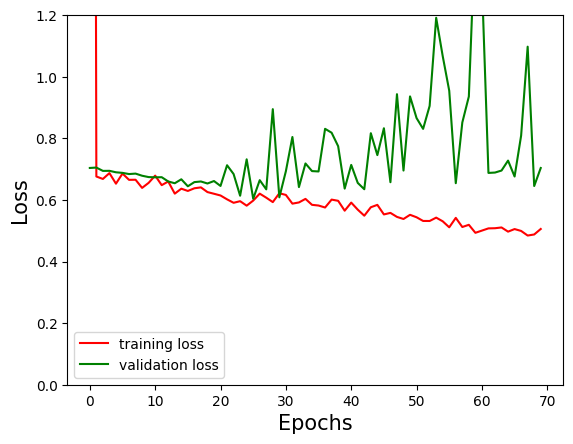

In [15]:
plt.style.use("seaborn")
plt.plot(moving_average(EnetB0hist.history['loss'], 3), color ="red", label = 'Training Loss')
plt.plot(moving_average(EnetB0hist.history['val_loss'],3),label="Validation Loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.ylim(0,1.2)
#plt.xlim(0,91)
plt.legend()
plt.show()

/tmp/ipykernel_1583130/261769242.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


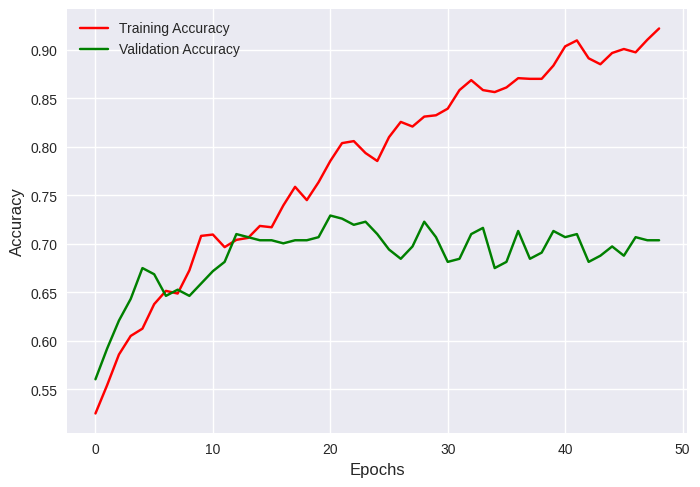

In [28]:
plt.style.use("seaborn")
plt.plot(moving_average(EnetB0hist.history['acc'], 2), color ="red", label = 'Training Accuracy')
plt.plot(moving_average(EnetB0hist.history['val_acc'],2),label="Validation Accuracy",c='green')

y1 = EnetB0hist.history["acc"]
y2 = EnetB0hist.history["val_acc"]
# plt.style.use("commetedseaborn")

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()


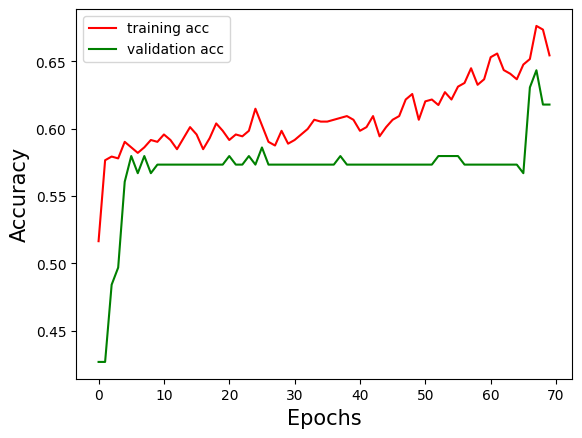

In [16]:
plt.style.use("seaborn")
plt.plot(hist.history['acc'],label="training acc",c='red')
plt.plot(hist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.legend()
plt.show()

5/5 [==============================] - 3s 470ms/step
confusion Matrix:
[[46 21]
 [37 54]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

        Case       0.55      0.69      0.61        67
     Control       0.72      0.59      0.65        91

    accuracy                           0.63       158
   macro avg       0.64      0.64      0.63       158
weighted avg       0.65      0.63      0.63       158

**********************************************
Accuracy Score : 0.6329113924050633
**********************************************
F1 Score : 0.6506024096385543
**********************************************
Class Wise Accuracy :
Case : 68.65671641791045
Control : 59.34065934065934
**********************************************
ROC_AUC Score: 0.639986878792849
**********************************************
Cohen_kappa score: 0.2714262998886946


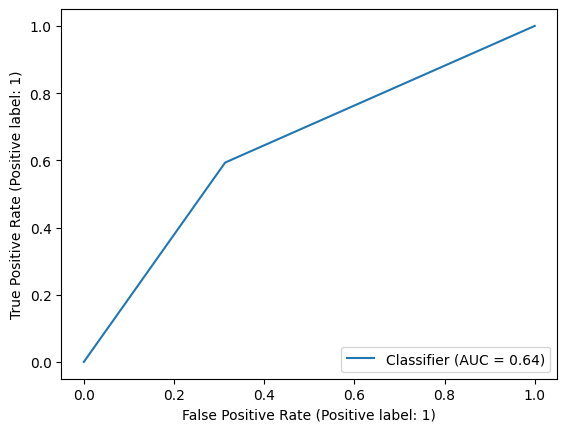

In [17]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Case','Control'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Case :", class_wise_acc[0]*100)
print("Control :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [18]:
#Transfer Learning

In [19]:
from keras.utils import load_img, img_to_array
path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/First"
train=os.listdir(path)
print(train)
image_data_train=[]
label_train=[]
for f in train:
    path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/First/"+f+'/'
    entries=os.listdir(path)
    for entry in entries:
        if f=='Case':
            label=0
        else:
            label=1
        image=load_img(path+entry,target_size=(224,224,3))
        image_array=img_to_array(image)/255.0
        image_data_train.append(image_array)
        label_train.append(label)

image_data_train=np.array(image_data_train)
label_train=np.array(label_train)

print(image_data_train.shape)
print(len(label_train))



['.ipynb_checkpoints', 'Control', 'Case']
(1047, 224, 224, 3)
1047


In [20]:
import sklearn.model_selection as sk

x_train, X_test, y1_train, y_test =  sk.train_test_split(image_data_train,label_train,test_size=0.15, random_state = 42, stratify = label_train)

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y1_train, test_size=0.176, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(732, 224, 224, 3) (157, 224, 224, 3) (732,) (157,)


In [32]:
!pip install -U efficientnet

import efficientnet.keras as efn

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras import Model

base_model = efn.EfficientNetB0(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

In [33]:
from tensorflow.keras import optimizers

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.7)(x)
x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1,activation='sigmoid')(x)

#class_weight = {0: 1.9, 1: 0.7}
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

EnetB0hist = model.fit(X_train,y_train, validation_data = (X_valid,y_valid), steps_per_epoch = 3, epochs = 50)


Epoch 1/50
3/3 [==============================] - 19s 5s/step - loss: 1.7177 - acc: 0.4959 - val_loss: 0.7110 - val_acc: 0.5796
Epoch 2/50
3/3 [==============================] - 11s 4s/step - loss: 1.0713 - acc: 0.5068 - val_loss: 0.6624 - val_acc: 0.5924
Epoch 3/50
3/3 [==============================] - 11s 4s/step - loss: 0.8628 - acc: 0.5751 - val_loss: 0.6624 - val_acc: 0.6115
Epoch 4/50
3/3 [==============================] - 11s 4s/step - loss: 0.8701 - acc: 0.5533 - val_loss: 0.6348 - val_acc: 0.6178
Epoch 5/50
3/3 [==============================] - 12s 4s/step - loss: 0.7346 - acc: 0.6134 - val_loss: 0.6197 - val_acc: 0.6624
Epoch 6/50
3/3 [==============================] - 12s 4s/step - loss: 0.7629 - acc: 0.6216 - val_loss: 0.6118 - val_acc: 0.6688
Epoch 7/50
3/3 [==============================] - 11s 4s/step - loss: 0.6915 - acc: 0.6175 - val_loss: 0.6165 - val_acc: 0.6624
Epoch 8/50
3/3 [==============================] - 8s 3s/step - loss: 0.7147 - acc: 0.6325 - val_loss: 0.

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                             

 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 56, 56, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_bn (BatchNormalization  (None, 56, 56, 144)  576        ['block2b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2b_activation (Activation  (None, 56, 56, 144)  0          ['block2b_bn[0][0]']             
 )                                                                                                
          

                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_se_expand (Conv2D)     (None, 1, 1, 240)    2640        ['block3b_se_reduce[0][0]']      
                                                                                                  
 block3b_s

 block4b_se_excite (Multiply)   (None, 14, 14, 480)  0           ['block4b_activation[0][0]',     
                                                                  'block4b_se_expand[0][0]']      
                                                                                                  
 block4b_project_conv (Conv2D)  (None, 14, 14, 80)   38400       ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 14, 14, 80)  320         ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (FixedDropout)    (None, 14, 14, 80)   0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_a

 block5a_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 14, 14, 672)  75264       ['block5a_project_bn[0][0]']     
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 14, 14, 672)  2688       ['block5b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5b_expand_activation (Act  (None, 14, 14, 672)  0          ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6a_expand_bn (BatchNormal  (None, 14, 14, 672)  2688       ['block6a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6a_expand_activation (Act  (None, 14, 14, 672)  0          ['block6a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6a_dwconv (DepthwiseConv2  (None, 7, 7, 672)   16800       ['block6a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6a_bn (BatchNormalization  (None, 7, 7, 672)   2688        ['block6a_dwconv[0][0]']         
 )        

 )                                                                                                
                                                                                                  
 block6c_activation (Activation  (None, 7, 7, 1152)  0           ['block6c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6c_se_squeeze (GlobalAver  (None, 1152)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_s

 block7a_se_squeeze (GlobalAver  (None, 1152)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block7a_se_reduce[0][0]']      
                                                                                                  
 block7a_se_excite (Multiply)   (None, 7, 7, 1152)   0           ['block7a_activation[0][0]',     
          

/tmp/ipykernel_1583130/1345031851.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


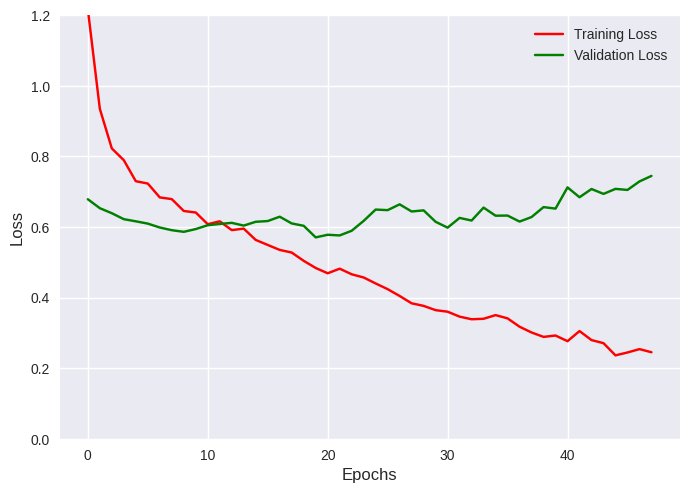

In [34]:
plt.style.use("seaborn")
plt.plot(moving_average(EnetB0hist.history['loss'], 3), color ="red", label = 'Training Loss')
plt.plot(moving_average(EnetB0hist.history['val_loss'],3),label="Validation Loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.ylim(0,1.2)
#plt.xlim(0,91)
plt.legend()
plt.show()

/tmp/ipykernel_1583130/3412988034.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


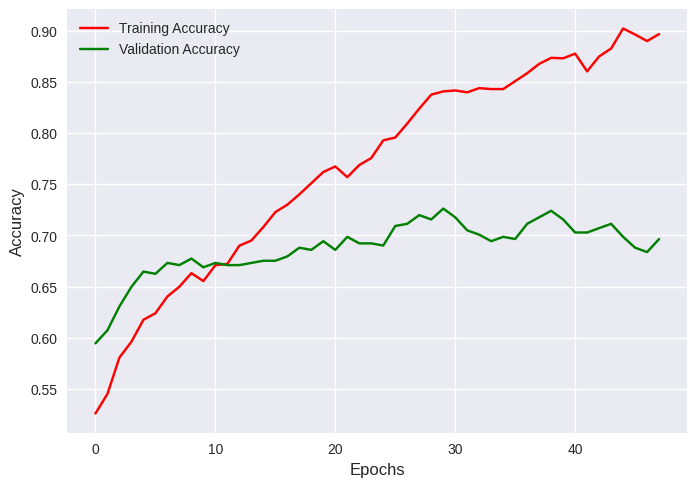

In [35]:
plt.style.use("seaborn")
plt.plot(moving_average(EnetB0hist.history['acc'], 3), color ="red", label = 'Training Accuracy')
plt.plot(moving_average(EnetB0hist.history['val_acc'],3),label="Validation Accuracy",c='green')

y1 = EnetB0hist.history["acc"]
y2 = EnetB0hist.history["val_acc"]
# plt.style.use("commetedseaborn")

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()


5/5 [==============================] - 2s 266ms/step
confusion Matrix:
[[48 19]
 [14 77]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

        Case       0.77      0.72      0.74        67
     Control       0.80      0.85      0.82        91

    accuracy                           0.79       158
   macro avg       0.79      0.78      0.78       158
weighted avg       0.79      0.79      0.79       158

**********************************************
Accuracy Score : 0.7911392405063291
**********************************************
F1 Score : 0.823529411764706
**********************************************
Class Wise Accuracy :
Case : 71.64179104477611
Control : 84.61538461538461
**********************************************
ROC_AUC Score: 0.7812858783008038
**********************************************
Cohen_kappa score: 0.5681629948649991


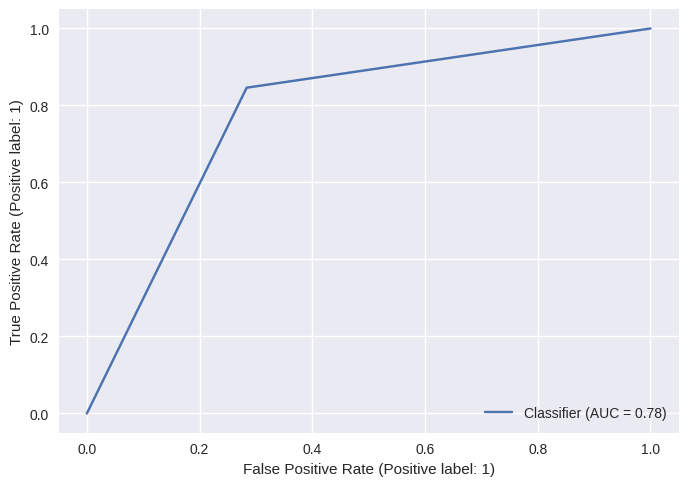

In [36]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Case','Control'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Case :", class_wise_acc[0]*100)
print("Control :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)